<a href="https://colab.research.google.com/github/sayeghmutaz-001/DataEngineering3/blob/main/in_class_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
A. Creat Assertions
  1) a. Every record have a Crash ID # Assertion held after testing 
     b. Every crash have a Crash Date field # Assertion did not hold. Needed to be modified. Date field is split into Year, Month and Day  
     c. Every crash will have a Serial # #Assertion held after testing
  
  2) a. Crash Day should be between 1 and 31 # Assertion held after testing
     b. Crash Month should be between 1 and 12 # Assertion held after testing

  3) a. Every City Section ID corespond to one County Code #
     b. Intersection Sequence Number correspond to one Nearest Intersection Street Number

  4) a. Every crash (CRASH_ID) will have a CRASH_TYP_CD
     b. Every crash (CRASH_ID) will have a WTHR_COND_CD
    
  5) a. Every crash (CRASH_ID) will have roadway number
     b. Every crash (CRASH_ID) will have Total Vehicle Count

  6) a. Every crash will have a valid crash serverity code
     b. Every crash will have a valid weather condition code

  7) a. Crashs are more frequent during winter
     b. Crashs are more frequent during busy hours (7AM and 5 PM as commuters are commuting to and from work.)

In [1]:
import pandas as pd
from google.colab import drive

# Import Libraries and data set.

In [2]:
data = pd.ExcelFile('https://github.com/sayeghmutaz-001/DataEngineering3/blob/main/Oregon%20Hwy%2026%20Crash%20Data%20for%202019.xlsx?raw=true')

In [3]:
sheet_name = data.sheet_names[0]
df = data.parse(sheet_name)
df.head(20)

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,NaN,NaN,9.0,16.77,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
5,1809229,1,NaN,NaN,NaN,NaN,NaN,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,NaN,1504.0,426,1.0,NaN,4.0,22.59,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1809229,2,3409765.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# General Observations


*   There are many fields with null or NaN values. Some of these fields I wouldexpect for them to have values in them such as Vehical ID and Patricipant ID.
*   There seems to be a redundancy in the number of rows per crash. For instance, Crash ID number 1809119 has five rows with many null values. 
*   Many of the fields values where Record Type is other than one are NaN.

 


In [ ]:
df.dtypes

Crash ID                                int64
Record Type                             int64
Vehicle ID                            float64
Participant ID                        float64
Participant Display Seq#              float64
                                       ...   
BAC Test Results Code                 float64
Alcohol Use Reported                  float64
Drug Use Reported                     float64
Participant Marijuana Use Reported    float64
Participant Striker Flag              float64
Length: 157, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Columns: 157 entries, Crash ID to Participant Striker Flag
dtypes: float64(148), int64(2), object(7)
memory usage: 3.3+ MB


# Split File into Crash, Vehicle and Participants Tables


In [4]:
crash_df = df[df['Record Type'] == 1]
vehicle_df = df[df['Record Type'] == 2]
participants_df = df[df['Record Type'] ==3]

Get summary information about the crashes table:

In [17]:
crash_row_count = crash_df.shape[0] #check number of records
unique_row_count = crash_df['Crash ID'].nunique()
crash_col_count = crash_df.shape[1]
print(crash_row_count)
print(unique_row_count)
print(crash_col_count)
crash_df.head() #take a peak at the data


508
508
157


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,NaN,NaN,9.0,16.77,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1809229,1,NaN,NaN,NaN,NaN,NaN,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,NaN,1504.0,426,1.0,NaN,4.0,22.59,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1809637,1,NaN,NaN,NaN,NaN,NaN,1811.0,5.0,17.0,2019.0,6.0,99.0,3.0,0.0,0.0,2.0,1.0,26.0,NaN,1.0,6.0,0.0,1.0,0026BG100S00,45.0,17.0,0.84,-121.0,42.0,58.38,0.0,NaN,NaN,NaN,NaN,NaN,0.0,57.56,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1810874,1,NaN,NaN,NaN,NaN,NaN,99981.0,4.0,7.0,2019.0,1.0,0.0,26.0,245.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,50.60,-122.0,33.0,59.51,0.0,NaN,1940.0,9715,1.0,NaN,7.0,5.69,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1812266,1,NaN,NaN,NaN,NaN,NaN,5970.0,7.0,8.0,2019.0,2.0,14.0,26.0,245.0,57.0,14.0,1.0,26.0,NaN,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,52.99,-122.0,30.0,38.24,0.0,NaN,1940.0,5148,1.0,NaN,9.0,8.55,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all columns in the newly constructed crash dataframe that have values NaN and compare the two dataframes (before and after).

In [16]:
crashes = crash_df.dropna(axis=1,how='all')
crashes_row_cnt = crashes.shape[0]
crashes_col_cnt = crashes.shape[1]
print(crashes_row_cnt)
print(crashes_col_cnt)
crashes.head()

508
93


,Crash ID,Record Type,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,Milepoint,Posted Speed Limit,Road Character,Off Roadway Flag,Intersection Type,Intersection Related Flag,Roundabout Flag,Driveway Related Flag,...,Crash Level Event 1 Code,Crash Level Event 2 Code,Crash Level Event 3 Code,Crash Level Cause 1 Code,Crash Level Cause 2 Code,Crash Level Cause 3 Code,School Zone Indicator,Work Zone Indicator,Secondary Crash Indicator,Alcohol-Involved Flag,Drugs Involved Flag,Crash Marijuana Involved Flag,Speed Involved Flag,Crash Level Hit & Run Flag,Population Range Code,Road Control,Route Type,Region ID,District ID,Segment Marker ID,Segment Point LRS Measure,Unlocatable Flag,Total Vehicle Count,Total Fatality Count,Total Suspected Serious Injury (A) Count,Total Suspected Minor Injury (B) Count,Total Possible Injury (C) Count,Total Non-Fatal Injury Count,Total Un-Injured Children Age 00-04,Total Un-Injured Persons,Total Pedestrian Count,Total Pedestrian Fatality Count,Total Pedestrian Non-Fatal Injury Count,Total Pedalcyclist Count,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count
0,1809119,1,99992.0,3.0,14.0,2019.0,5.0,14.0,26.0,0.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,27.0,40.62,-122.0,22.0,59.23,0.0,NaN,NaN,NaN,9.0,16.77,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,8.0,US,26.0,1.0,02C,293_10835,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,1.0
5,1809229,1,2405.0,3.0,3.0,2019.0,1.0,2.0,3.0,185.0,68.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,24.0,20.47,-122.0,17.0,37.30,0.0,1504.0,426,1.0,4.0,22.59,50.0,3.0,0.0,NaN,0.0,0.0,0.0,4.0,NaN,...,NaN,18.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,US,26.0,1.0,02C,293_8495,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
9,1809637,1,1811.0,5.0,17.0,2019.0,6.0,99.0,3.0,0.0,0.0,2.0,1.0,26.0,1.0,6.0,0.0,1.0,0026BG100S00,45.0,17.0,0.84,-121.0,42.0,58.38,0.0,NaN,NaN,NaN,0.0,57.56,55.0,7.0,1.0,NaN,0.0,0.0,0.0,1.0,NaN,...,NaN,1.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,NaN,5.0,NaN,NaN,1.0,02C,293_6389,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
12,1810874,1,99981.0,4.0,7.0,2019.0,1.0,0.0,26.0,245.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,50.60,-122.0,33.0,59.51,0.0,1940.0,9715,1.0,7.0,5.69,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,4.0,19.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,9.0,2.0,US,26.0,1.0,02B,293_12196,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
16,1812266,1,5970.0,7.0,8.0,2019.0,2.0,14.0,26.0,245.0,57.0,14.0,1.0,26.0,1.0,0.0,0.0,NaN,002600100S00,45.0,29.0,52.99,-122.0,30.0,38.24,0.0,1940.0,5148,1.0,9.0,8.55,35.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,4.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,2.0,US,26.0,1.0,02B,293_18831,0.0,4.0,2.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,2.0,0.0,3.0


Do the same for vehicle table

In [15]:
vehicle_row_count = vehicle_df.shape[0] #check number of records
unique_row_count = vehicle_df['Vehicle ID'].nunique()
vehicle_col_count = vehicle_df.shape[1]
print(vehicle_row_count)
print(unique_row_count)
print(vehicle_col_count)
vehicle_df.head() #take a peak at the data

1015
1015
157


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1809229,2,3409765.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1809637,2,3410470.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1810874,2,3412622.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all columns in the newly constructed vehicle dataframe that have values NaN and compare the two dataframes (before and after).

In [14]:
vehicles = vehicle_df.dropna(axis=1,how='all')
vehicles_row_cnt = vehicles.shape[0]
vehicles_col_cnt = vehicles.shape[1]
print(vehicles_row_cnt)
print(vehicles_col_cnt)
vehicles.head()

1015
24


,Crash ID,Record Type,Vehicle ID,Vehicle Coded Seq#,Total Count of Persons Involved,Total Persons Using Safety Equipment,Total Persons Not Using Safety Equipment,Total Persons Safety Equipment Use Unknown,Vehicle Ownership Code,Vehicle Special Use Code,Vehicle Type Code,Emergency Use Flag,Number of Trailers,Vehicle Movement Code,Vehicle Action Code,Vehicle Cause 1 Code,Vehicle Cause 2 Code,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity
1,1809119,2,3409578.0,1.0,1.0,0.0,9.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1809119,2,3409579.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,15.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,2.0,0.0
6,1809229,2,3409765.0,1.0,1.0,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
10,1809637,2,3410470.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,7.0,0.0,0.0,62.0,10.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0
13,1810874,2,3412622.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0


Do the same clean-up for participants table:

In [13]:
participants_row_count = participants_df.shape[0] #check number of records
unique_row_count = participants_df['Crash ID'].nunique()
participants_col_count = participants_df.shape[1]
print(participants_row_count)
print(participants_row_count)
print(participants_col_count)
participants_df.head() #take a peak at the data

1216
1216
157


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,Urban Area Code,Functional Class Code,NHS Flag,Highway Number,Highway Suffix,Roadway Number,Highway Component,Mileage Type,Connection Number,Linear Reference System (LRS),Latitude Degrees,Latitude Minutes,Latitude Seconds,Longitude Degrees,Longitude Minutes,Longitude Seconds,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Special Jurisdiction,Jurisdiction Group,Street Number,Nearest Intersecting Street Number,Intersection Sequence Number,Distance from Intersection,Direction From Intersection,...,Vehicle Cause 3 Code,Vehicle Event 1 Code,Vehicle Event 2 Code,Vehicle Event 3 Code,Vehicle Exceeded Posted Speed Flag,Vehicle Hit & Run Flag,Safety Equipment Used Quantity,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,41.0,2.0,4.0,9.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,2.0,32.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,50.0,70.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
11,1809637,3,3410470.0,3888766.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,90.0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,47.0,81.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Drop all columns in the newly constructed participants dataframe that have values NaN and compare the two dataframes (before and after).

In [12]:
participants = participants_df.dropna(axis=1,how='all')
participants_row_cnt = participants.shape[0]
participants_col_cnt = participants.shape[1]
print(participants_row_cnt)
print(participants_col_cnt)
participants.head()

1216
33


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Safety Equipment Un-used Quantity,Safety Equipment Use Unknown Quantity,Vehicle Occupant Count,Vehicle Striking Flag,Participant Type Code,Participant Hit & Run Flag,Public Employee Flag,Sex,Age,Driver License Status,Driver Residence Status,Injury Severity,Participant Safety Equipment Use Code,Airbag Deployment,Non-Motorist Movement Code,Non-Motorist Travel Direction From,Non-Motorist Travel Direction To,Non-Motorist Location,Participant Action,Participant Error 1 Code,Participant Error 2 Code,Participant Error 3 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,47.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,66.0,1.0,1.0,9.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,9.0,9.0,0.0
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,41.0,2.0,4.0,9.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,3.0,0.0,0.0,2.0,32.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.0,4.0,50.0,70.0,NaN,NaN,18.0,NaN,NaN,NaN,0.0,9.0,1.0,0.0
11,1809637,3,3410470.0,3888766.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,90.0,2.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,0.0,47.0,81.0,NaN,1.0,NaN,NaN,NaN,0.0,9.0,0.0,0.0


# Existence Assertions

*   Every record have a Crash ID. This assertion held after testing crashes dataframe. 
*   Every crash have a Crash Date field. This assertion did not hold. Needed to be modified as Crash Date field is split into Year, Month and Day.
*   Every crash will have a Serial #. Assertion held after testing.

As can be seen from the results below, there are 508 Crash IDs and an equal number of Serial #. Therefore, both esistence assertions hold.





In [11]:
print(crashes['Crash ID'].count())
#print(crashes['Crash Date']) # Did not exist. Data manual mentioned crash date however the actual field is not in the data set. 
print(crashes['Serial #'].count())#Although number of Serial # is less than number of records, testing shows that there are 508 unique Crash ID.
print(crashes['Crash ID'].nunique())

508
508
508


# Limit Assertions

After testing the following limit assertions, they both are valid 
*   Every Crash Day should be between 1 and 31
*   Every Crash Month should be between 1 and 12








In [ ]:
if crashes[crashes['Crash Day']<=0].shape[0] > 0 or crashes[crashes['Crash Day']>31].shape[0] > 0:
  print("Crash Day is out of range (1 - 31)!")
else:
  print("Crash Day field is within range (1 - 31).")

Crash Day field is within range (1 - 31).


In [ ]:
if crashes[crashes['Crash Month']<=0].shape[0] > 0 or crashes[crashes['Crash Month']>12].shape[0] > 0:
  print("Crash Month is out of range (1 - 12)!")
else:
  print("Crash Month field is within range (1 - 12).")

Crash Month field is within range (1 - 12).


# Intra-Record Assertions



*   Check the Total Vehicle Count to ensure that every crash has at least one vehicle. This did not hold! There are 163 crashes with zero values in this field. Hence, we cannot use the Total Vehicle Count field as a source to obtain number of vehicles involved in the crash.
*   Every crash should have at least one participant. Checked this assertion by checking if there are any NaN values in the Participant ID field with in the participants table.



In [ ]:
num_zero_vehicles = crashes[crashes['Total Vehicle Count']==0].shape[0]
print(num_zero_vehicles)

163


In [ ]:
num_of_participants = participants['Participant ID'].isna().sum()
print("There are " + str(num_of_participants) + " NaN in the Participant ID field")

There are 0 NaN in the Participant ID field


# Inter-Record Assertions


*   Every crash will have at least one vehicle. This assertion is checked by counting number of uniuqe crashes in the vehicle table.
*   The total number of persons involved in the crashes from the vehicles table should tie to the number of participants in the participants table. 



In [ ]:
crashes_cnt = crashes['Crash ID'].shape[0]
crashes_in_vehicles = vehicles['Crash ID'].nunique()

if crashes_cnt == crashes_in_vehicles:
  print('The number of crashes match the number of vehicle.')
else:
  print('The number of crashes did not match the number of vehicle!')
  
print('There were ' + str(crashes_cnt)  + ' in the crashes table and ' + str(crashes_in_vehicles) + ' crashes in the vehicles table.')  

The number of crashes match the number of vehicle.
There were 508 in the crashes table and 508 crashes in the vehicles table.


In [ ]:
cnt_participants_participants_table = 0
cnt_participants_vehicle_table = 0
cnt_participants_vehicle_table = vehicles['Total Count of Persons Involved'].sum()
cnt_participants_participants_table = participants['Participant ID'].count()
print(cnt_participants_participants_table)
print(cnt_participants_vehicle_table)

1216
1282.0


# Summary Assertions


*   Every vehicle will have unique id
*   Every participant will have a unique participant id



In [ ]:
print(vehicles['Vehicle ID'].nunique())
print(vehicles['Vehicle ID'].count())

1015
1015


In [ ]:
print(participants['Participant ID'].nunique())
print(participants['Participant ID'].count())

1216
1216


# Referential Assertions


*   Every crash has a known week day code within 1 - 7
*   Every crash has a known crash year



In [25]:
outside_limits_week_day = 0
outside_limits_week_day = crashes['Week Day Code'].isna().sum() + crashes[crashes['Week Day Code']<1].shape[0] + crashes[crashes['Week Day Code']> 7].shape[0]
print("Number of weekday codes that are outside of limits is " + str(outside_limits_week_day))

Number of weekday codes that are outside of limits is 0


In [27]:
outside_limit_year = 0 
outside_limit_year = crashes['Crash Year'].isna().sum() + crashes[crashes['Crash Year']>2021].shape[0] + crashes[crashes['Crash Year']<1900].shape[0]
print("Number of crash years that are outside of limit is " + str(outside_limit_year))

Number of crash years that are outside of limit is 0


In [ ]:
crash_key = df['Serial #'] + df['County Code'] + df['Crash Year'] #create key 
crash_key_count = crash_key.nunique() #count distinct crash_key
print(crash_key_count)

502


# Statistics Assertion


*   Crashes are more frequent during winter season
*   Crashes are more frequent during high traffic hours



In [28]:
crashes.groupby(['Crash Month']).size()

Crash Month
1.0     56
2.0     46
3.0     57
4.0     53
5.0     41
6.0     36
7.0     37
8.0     33
9.0     34
10.0    36
11.0    35
12.0    44
dtype: int64

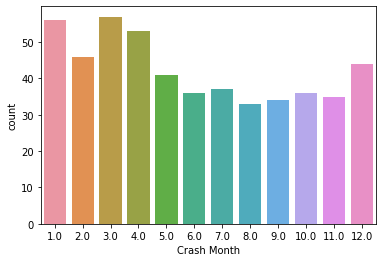

In [31]:
import seaborn as sns
ax = sns.countplot(x='Crash Month',data=crashes)

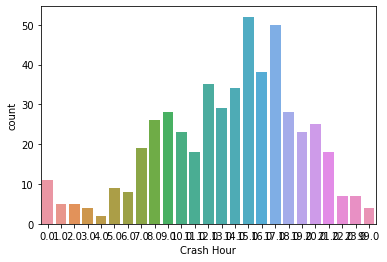

In [ ]:
hist2 = sns.countplot(x=df3['Crash Hour'], data=df3)

# Before moving on to Part E, I've iterated many, many times over A - D to get these steps correctly (learned lots of pandas and Python along the way too! So thank you!) 

# PART E
The assertion viloation that I had was that there was no Crash Date. However, there are Crash Year, Crash Month, and Crash Day. Therefore, a crash date can be senthisised from these columns.

In [104]:
from datetime import date

for i in range(crash_row_count):
  crashes.iloc[i,93] = str(crashes.iloc[i,3].astype(int)).zfill(2) + '-'+ str(crashes.iloc[i,4].astype(int)).zfill(2)+ '-'+ str(crashes.iloc[i,5].astype(int))



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [106]:
crashes.iloc[:,92]

0       03-14-2019
5       03-03-2019
9       05-17-2019
12      04-07-2019
16      07-08-2019
           ...    
2716    04-19-2019
2719    04-20-2019
2724    04-13-2019
2729    04-22-2019
2734    05-06-2019
Name: Total Vehicle Occupant Count, Length: 508, dtype: object